##### $\hspace{15pt}$ **Filename: autoML.ipynb**
##### $\hspace{1.5pt}$ **Date Created: October 17, 2023**
##### **Date Modified: November 16, 2023**
##### $\rule{10.5in}{1pt}$
##### **Train and test predictive models on the [heart disease prediction dataset](https://www.kaggle.com/datasets/moazeldsokyx/heart-disease) from Kaggle using the following AutoML libraries:**
* **[auto-sklearn](https://automl.github.io/auto-sklearn/master/index.html#)**
* **[PyCaret](https://pycaret.org/)**

##### **The runtime and the notebook may need to be restarted and be run again in case one of the modules or packages fails to load.**

##### $\rule{10.5in}{1pt}$

##### Install auto-sklearn. The installation here in Colab does not work when running *!pip install auto-sklearn*. A sequence of steps that does work is available from this [GitHub issue](https://github.com/automl/auto-sklearn/issues/1684).

In [ ]:
!pip install Cython==0.29.36 -q
!pip uninstall scipy -q -y
!pip install scipy==1.9 -q
!pip uninstall pyparsing -q -y
!pip install pyparsing==2.4 -q
!pip uninstall scikit_learn -q -y
!pip uninstall imbalanced-learn -q -y
!pip uninstall mlxtend -q -y
!pip uninstall yellowbrick -q -y
!pip install scikit-learn==0.24.2 --no-build-isolation -q
!pip install auto-sklearn -q

##### Install pycaret.

In [ ]:
!pip install pycaret[full] -q

##### Update seaborn.

In [ ]:
!pip install -U seaborn -q

##### Load modules and packages.

In [ ]:
from google.colab import drive
from pycaret.classification import *
from sklearn import metrics
from sklearn.inspection import permutation_importance
import autosklearn.classification
import autosklearn.ensembles
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns

##### Set the float format of pandas dataframes.

In [ ]:
pd.options.display.float_format = "{:.4f}".format

##### Mount Google Drive to Colab.

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


##### Load the train and test sets from Google Drive.

In [ ]:
path = "gdrive/MyDrive/Colab Notebooks/4_autoML/"
trainSet = pd.read_csv(path + "train.csv")
trainSet.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0000,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1000,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6000,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9000,1,3,2,0


In [ ]:
testSet = pd.read_csv(path + "test.csv")
testSet.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6000,2,0,2,1


##### Visualize the continuous features in the train set.

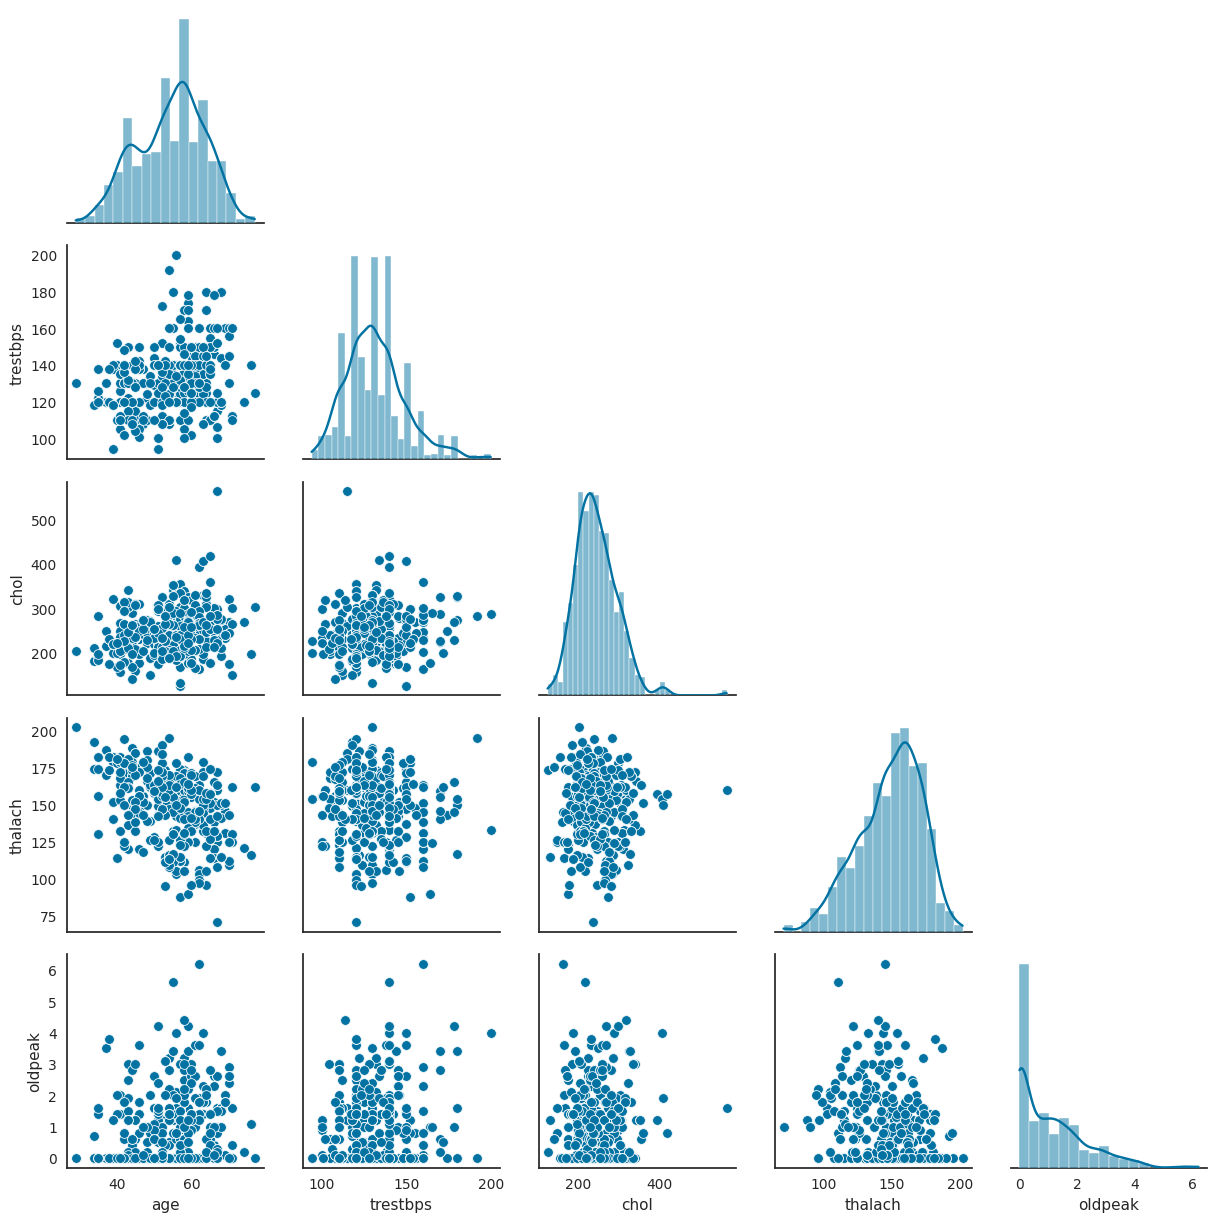

In [ ]:
sns.set_style("white")
grid = sns.PairGrid(trainSet, vars = ["age", "trestbps", "chol", "thalach", "oldpeak"], corner = True, diag_sharey = False)
grid.map_diag(sns.histplot, stat = "percent", kde = True)
grid.map_lower(sns.scatterplot)
plt.show()

##### Visualize the categorical features in the train set.

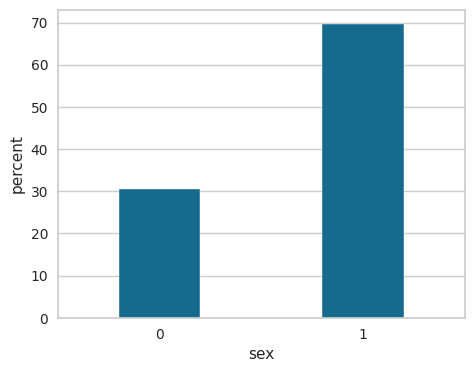

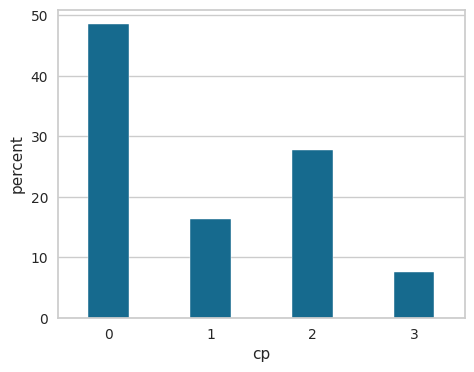

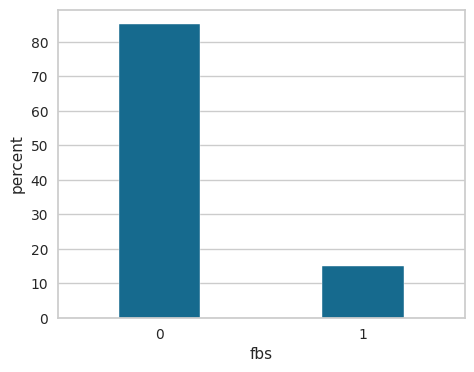

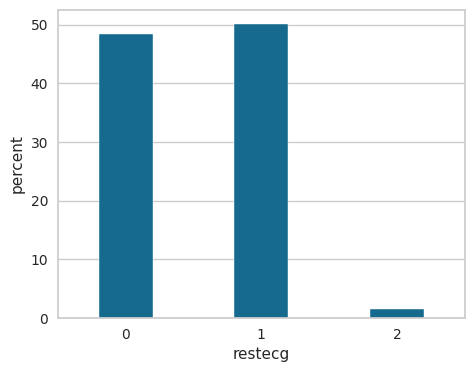

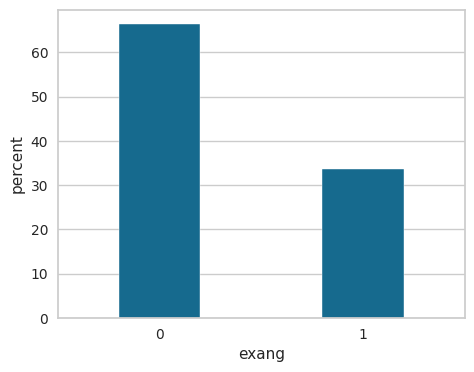

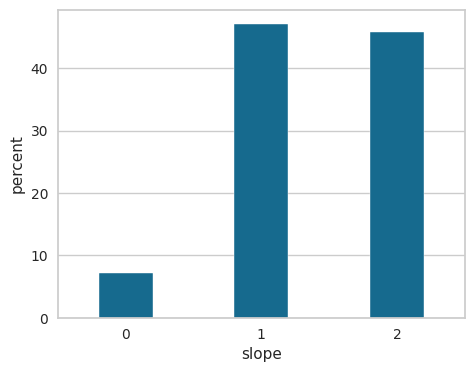

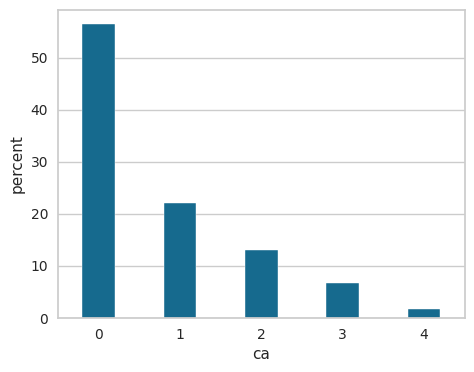

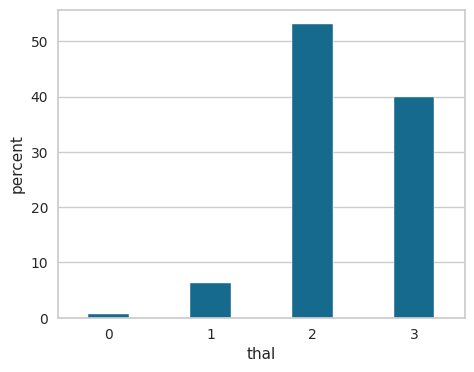

In [ ]:
plt.rcParams["figure.figsize"] = [5.25, 4]
sns.set_style("whitegrid")

categoricalFeatures = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

for feature in categoricalFeatures:

    uniqueValues = trainSet[feature].unique().tolist()
    uniqueValues.sort()

    sns.countplot(data = trainSet, x = feature, order = uniqueValues, stat = "percent", width = 0.4)

    plt.show()

##### Visualize the target in the train set.

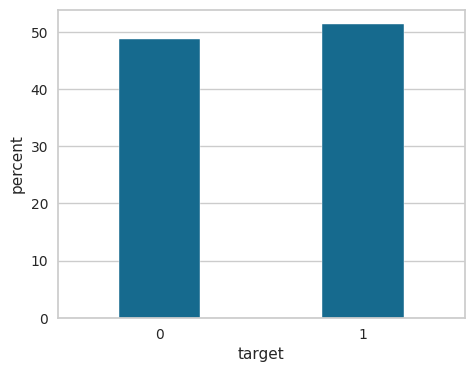

In [ ]:
uniqueValues = trainSet["target"].unique().tolist()
uniqueValues.sort()

sns.countplot(data = trainSet, x = "target", order = uniqueValues, stat = "percent", width = 0.4)

plt.show()

##### Create a correlation heatmap using the variables in the train set.

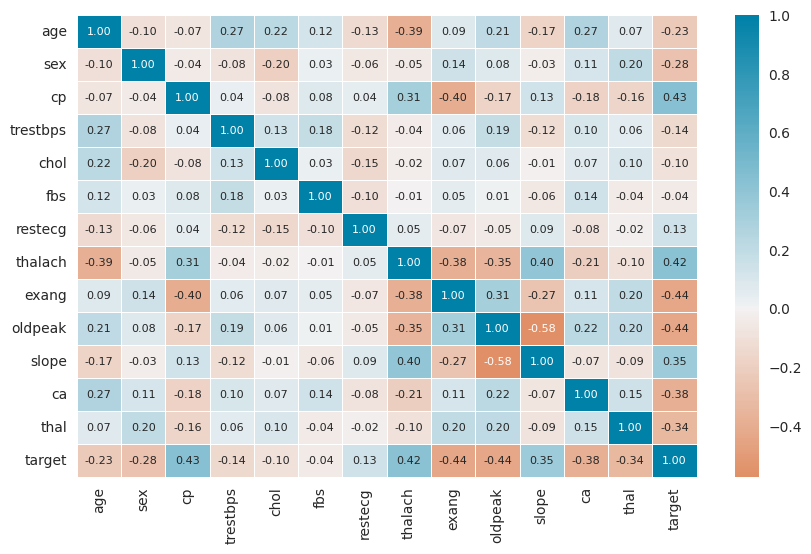

In [ ]:
plt.rcParams["figure.figsize"] = [10, 6]
cmap = sns.diverging_palette(20, 230, s = 100, as_cmap = True)
sns.heatmap(trainSet.corr(), cmap = cmap, center = 0, annot = True, annot_kws = {"fontsize": 8}, fmt = ".2f", linewidths = 0.5)
plt.show()

$\hspace{1in}$

##### **auto-sklearn**

Create models, fit them to the training set, and choose the best model.

In [ ]:
autoSklearnModels = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task = 900, ensemble_class = autosklearn.ensembles.SingleBest,
                                                                     resampling_strategy = "cv", resampling_strategy_arguments = {"folds": 10})
xTrain = trainSet.drop(columns = ["target"])
yTrain = trainSet[["target"]]
autoSklearnModels.fit(xTrain, yTrain, dataset_name = "trainSet")

[WARNING] [2023-11-16 02:42:30,589:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2023-11-16 02:42:56,424:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2023-11-16 02:43:19,105:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2023-11-16 02:43:30,547:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2023-11-16 02:43:39,424:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2023-11-16 02:43:45,433:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] 

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.singlebest_ensemble.SingleBest'>,
                      per_run_time_limit=90, resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 10},
                      time_left_for_this_task=900)

##### Display statistics of the training of models.

In [ ]:
print(autoSklearnModels.sprint_statistics())

auto-sklearn results:
  Dataset name: trainSet
  Metric: accuracy
  Best validation score: 1.000000
  Number of target algorithm runs: 37
  Number of successful target algorithm runs: 30
  Number of crashed target algorithm runs: 5
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 0



##### Display all the models trained during the search process.

In [ ]:
trainedModels = autoSklearnModels.leaderboard(ensemble_only = False)
trainedModels.sort_values(by = ['rank'], inplace = True)
trainedModels

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
2,1,1.0000,random_forest,0.0000,23.8949
3,2,0.0000,mlp,0.0000,77.7345
31,3,0.0000,k_nearest_neighbors,0.0000,5.8329
33,4,0.0000,adaboost,0.0000,16.4775
18,5,0.0000,extra_trees,0.0000,22.1340
28,6,0.0000,k_nearest_neighbors,0.0000,16.2384
23,7,0.0000,gradient_boosting,0.0039,15.7338
10,8,0.0000,random_forest,0.0059,27.6036
16,9,0.0000,extra_trees,0.0078,41.0444


##### Display the best model.

In [ ]:
autoSklearnModels.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
2,1,1.0000,random_forest,0.0000,23.8949


In [ ]:
autoSklearnModels.show_models()

{2: {'model_id': 2,
  'rank': 1,
  'cost': 0.0,
  'ensemble_weight': 1.0,
  'voting_model': VotingClassifier(estimators=None, voting='soft'),
  'estimators': [{'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7a6b4496ba90>,
    'balancing': Balancing(random_state=1),
    'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7a6b348d3dc0>,
    'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7a6b348d1f30>,
    'sklearn_classifier': RandomForestClassifier(max_features=3, n_estimators=512, n_jobs=1,
                           random_state=1, warm_start=True)},
   {'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7a6b3396f250>,
    'balancing': Balancing(random_state=1),
    'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7a6b3396d9c0>,


##### Predict on test set.

In [ ]:
xTest = testSet.drop(columns = ["target"])
predictionLabels = autoSklearnModels.predict(xTest)
predictionScores = autoSklearnModels.predict_proba(xTest)[:, 1]

testSetPredictions = xTest.copy()
testSetPredictions["prediction_label"] = predictionLabels
testSetPredictions["prediction_score"] = predictionScores
testSetPredictions.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,prediction_label,prediction_score
0,63,1,3,145,233,1,0,150,0,2.3000,0,0,1,1,0.9709
1,37,1,2,130,250,0,1,187,0,3.5000,0,0,2,1,0.9650
2,41,0,1,130,204,0,0,172,0,1.4000,2,0,2,1,0.9994
3,56,1,1,120,236,0,1,178,0,0.8000,2,0,2,1,0.9945
4,57,0,0,120,354,0,1,163,1,0.6000,2,0,2,1,0.9709


##### Plot confusion matrix.

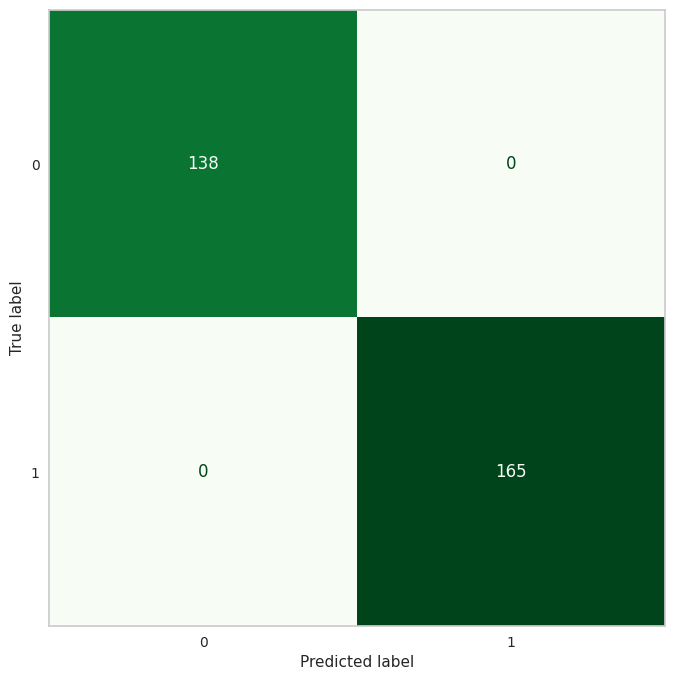

In [ ]:
yTest = testSet["target"]
yPred = testSetPredictions["prediction_label"]
confusionMatrix = metrics.confusion_matrix(yTest, yPred)

plt.rcParams["figure.figsize"] = [12, 8]
display = metrics.ConfusionMatrixDisplay(confusionMatrix)
display.plot(cmap = plt.cm.Greens, colorbar = False)
plt.grid(None)
plt.show()

##### Plot ROC curve.

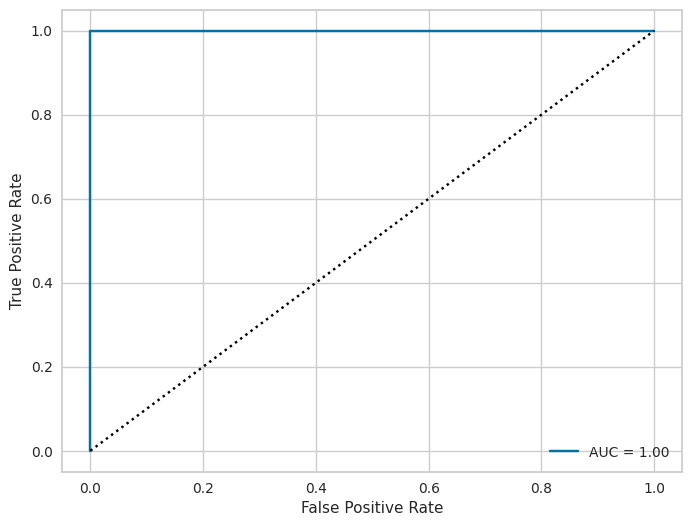

In [ ]:
plt.rcParams["figure.figsize"] = [8, 6]
fpr, tpr, thresholds = metrics.roc_curve(yTest, predictionScores)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc)
display.plot()
plt.plot([0, 1], [0, 1], linestyle = "dotted", color = "black")
plt.show()

##### Plot permutation importance of the features.

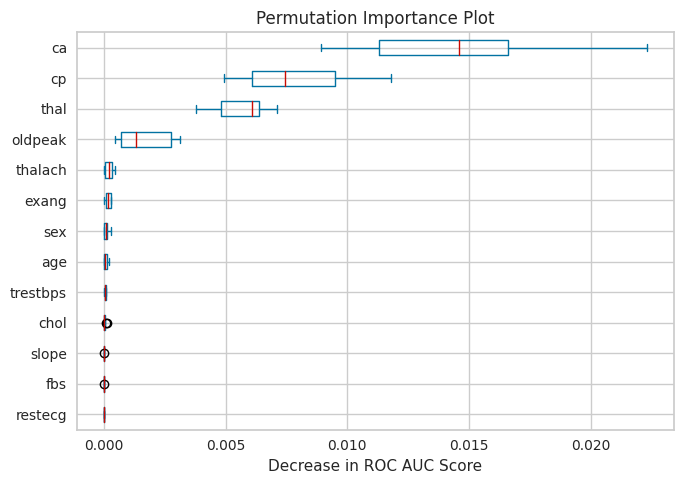

In [ ]:
result = permutation_importance(autoSklearnModels, xTest, yTest, n_repeats = 10, random_state = 1, n_jobs = 4, scoring = "roc_auc")
sortedIdx = result.importances_mean.argsort()
importances = pd.DataFrame(result.importances[sortedIdx].T, columns = xTest.columns[sortedIdx])

plt.rcParams["figure.figsize"] = [7, 5]
ax = importances.plot.box(vert = False)
ax.set_title("Permutation Importance Plot")
ax.set_xlabel("Decrease in ROC AUC Score")
ax.figure.tight_layout()

##### Save best model.

In [ ]:
pickle.dump(autoSklearnModels, open(path + "autoSklearnBestModel.pickle", "wb"))

##### Load best model.

In [ ]:
loadedAutoSklearnBestModel = pickle.load(open(path + "autoSklearnBestModel.pickle", "rb"))

$\hspace{1in}$

##### **PyCaret**

##### Initialize the training environment.

In [ ]:
trainingEnv = setup(trainSet, target = "target", index = False, test_data = testSet, session_id = 1)

,Description,Value
0,Session id,1
1,Target,target
2,Target type,Binary
3,Original data shape,"(1328, 14)"
4,Transformed data shape,"(1328, 14)"
5,Transformed train set shape,"(1025, 14)"
6,Transformed test set shape,"(303, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


##### Train and compare models, and choose the best model.

In [ ]:
pyCaretBestModel = compare_models()
pyCaretBestModel

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0970
dt,Decision Tree Classifier,0.9971,0.9972,0.9943,1.0000,0.9971,0.9942,0.9943,0.0530
rf,Random Forest Classifier,0.9971,1.0000,1.0000,0.9945,0.9972,0.9941,0.9943,0.3240
et,Extra Trees Classifier,0.9971,1.0000,1.0000,0.9945,0.9972,0.9941,0.9943,0.2000
lightgbm,Light Gradient Boosting Machine,0.9971,1.0000,1.0000,0.9945,0.9972,0.9941,0.9943,0.7690
catboost,CatBoost Classifier,0.9941,0.9998,1.0000,0.9892,0.9944,0.9883,0.9886,1.9990
gbc,Gradient Boosting Classifier,0.9707,0.9910,0.9735,0.9702,0.9714,0.9415,0.9423,0.1730
ada,Ada Boost Classifier,0.8936,0.9625,0.8917,0.9014,0.8956,0.7872,0.7888,0.1360
lr,Logistic Regression,0.8448,0.9170,0.8992,0.8179,0.8561,0.6885,0.6933,1.1150
qda,Quadratic Discriminant Analysis,0.8418,0.9257,0.8649,0.8348,0.8485,0.6831,0.6855,0.0280


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

##### Predict on test set.

In [ ]:
testSetPredictions = predict_model(pyCaretBestModel)
testSetPredictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,prediction_label,prediction_score
1025,63,1,3,145,233,1,0,150,0,2.3000,0,0,1,1,1,0.9935
1026,37,1,2,130,250,0,1,187,0,3.5000,0,0,2,1,1,0.9922
1027,41,0,1,130,204,0,0,172,0,1.4000,2,0,2,1,1,0.9999
1028,56,1,1,120,236,0,1,178,0,0.8000,2,0,2,1,1,0.9996
1029,57,0,0,120,354,0,1,163,1,0.6000,2,0,2,1,1,0.9965


##### Plot confusion matrix.

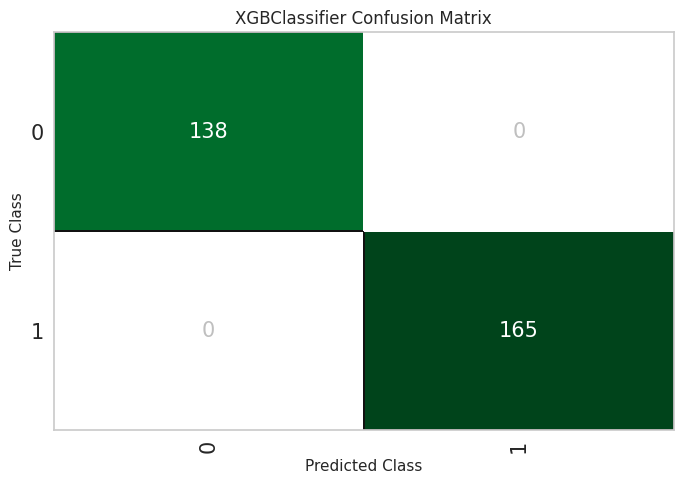

In [ ]:
plt.rcParams["figure.figsize"] = [7, 5]
plot_model(pyCaretBestModel, plot = "confusion_matrix")

##### Plot ROC curve.

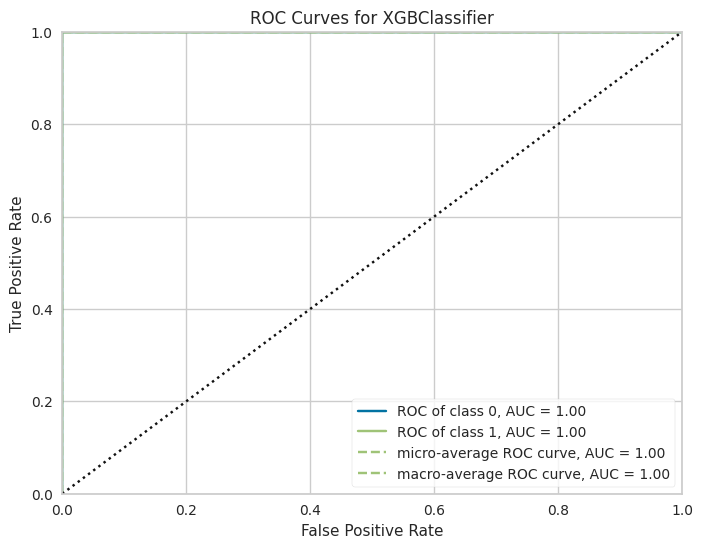

In [ ]:
plt.rcParams["figure.figsize"] = [8, 6]
plot_model(pyCaretBestModel, plot = "auc")

##### Plot feature importance.

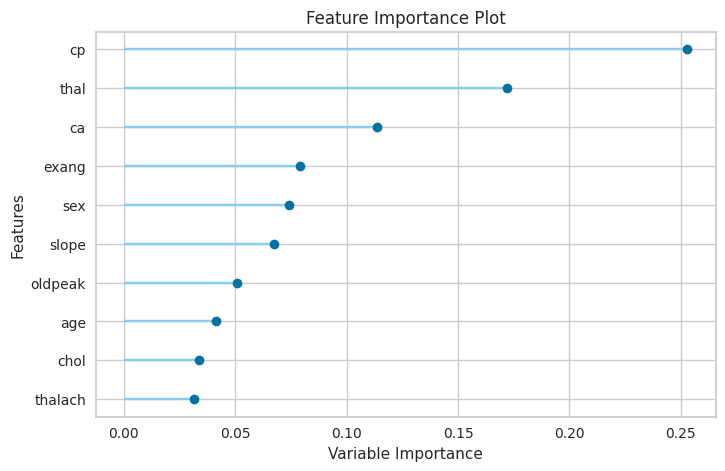

In [ ]:
plot_model(pyCaretBestModel, plot = "feature")

##### Save pipeline and best model.

In [ ]:
save_model(pyCaretBestModel, path + "pyCaretBestModel")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'sex', 'cp', 'trestbps',
                                              'chol', 'fbs', 'restecg',
                                              'thalach', 'exang', 'oldpeak',
                                              'slope', 'ca', 'thal'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='d...
     

##### Load pipeline and best model.

In [ ]:
loadedPyCaretBestModel = load_model(path + "pyCaretBestModel")
loadedPyCaretBestModel

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'sex', 'cp', 'trestbps',
                                             'chol', 'fbs', 'restecg',
                                             'thalach', 'exang', 'oldpeak',
                                             'slope', 'ca', 'thal'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'...
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None,
                               objective='binary:logistic', ...))],
         verbose=False)